In [99]:
# import neccessary libraries

# for data manipulation
import numpy as np
import pandas as pd

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for metrics and useful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
    f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# for saving models
import pickle

In [100]:
# read in the dataset as a pandas dataframe
HR_df0 = pd.read_csv(r"C:\Users\SpeeJ\OneDrive\Desktop\Google_Advanced_DA_Course_Stuff\Capstone_Project\HR_comma_sep.csv")
pd.set_option('display.max_columns', None)

In [101]:
# look over the data
HR_df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

In [102]:
# check the datatypes and possible missing values
HR_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [103]:
# check out some statistical data about the dataframe
HR_df0.describe(include='all')

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

In [104]:
# make all data column titles snake_case
HR_df0 = HR_df0.rename(columns={'Work_accident': 'work_accident',
                                'average_montly_hours': 'average_monthly_hours',
                                'time_spend_company': 'tenure',
                                'Department': 'department'})

#display the new column names
HR_df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [105]:
# check for missing values
HR_df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [106]:
# check for duplicates
HR_df0.duplicated().sum()

3008

In [107]:
# inspect the duplicated rows
duplicate_rows = HR_df0[HR_df0.duplicated()]
duplicate_rows.head(5)

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [108]:
# drop the duplicated rows as it is extremely unlikely for each of these columns to be the same for multiple employees
HR_df1 = HR_df0.copy()
HR_df1 = HR_df1.drop_duplicates(keep='first')
HR_df1.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

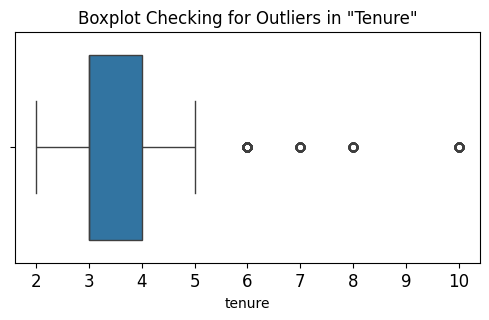

In [109]:
# check for outliers
# make a boxplot looking at 'tenure'
plt.figure(figsize=(6,3))
plt.title('Boxplot Checking for Outliers in "Tenure"', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=HR_df1['tenure'])
plt.show()

In [110]:
# determine the number rows containing outliers
# get the percentiles needed to get the iqr
percentile25 = HR_df1['tenure'].quantile(0.25)
percentile75 = HR_df1['tenure'].quantile(0.75)

# get the iqr
iqr = percentile75 - percentile25

# compute the upper and lower limits
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Upper limit:', upper_limit)
print('Lower limit:', lower_limit)

# now ge the rows that have outliers
tenure_outliers = HR_df1[(HR_df1['tenure'] < lower_limit) | (HR_df1['tenure'] > upper_limit)]

# finally get the number of outliers in the tenure column
print(len(tenure_outliers))

# depending on the model we use, we may or may not remove these outliers depending on the model's sensitivity to them

Upper limit: 5.5
Lower limit: 1.5
824


In [111]:
# get the number and percentage of employees that stayed and left
print(HR_df1['left'].value_counts())
print()

print(HR_df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


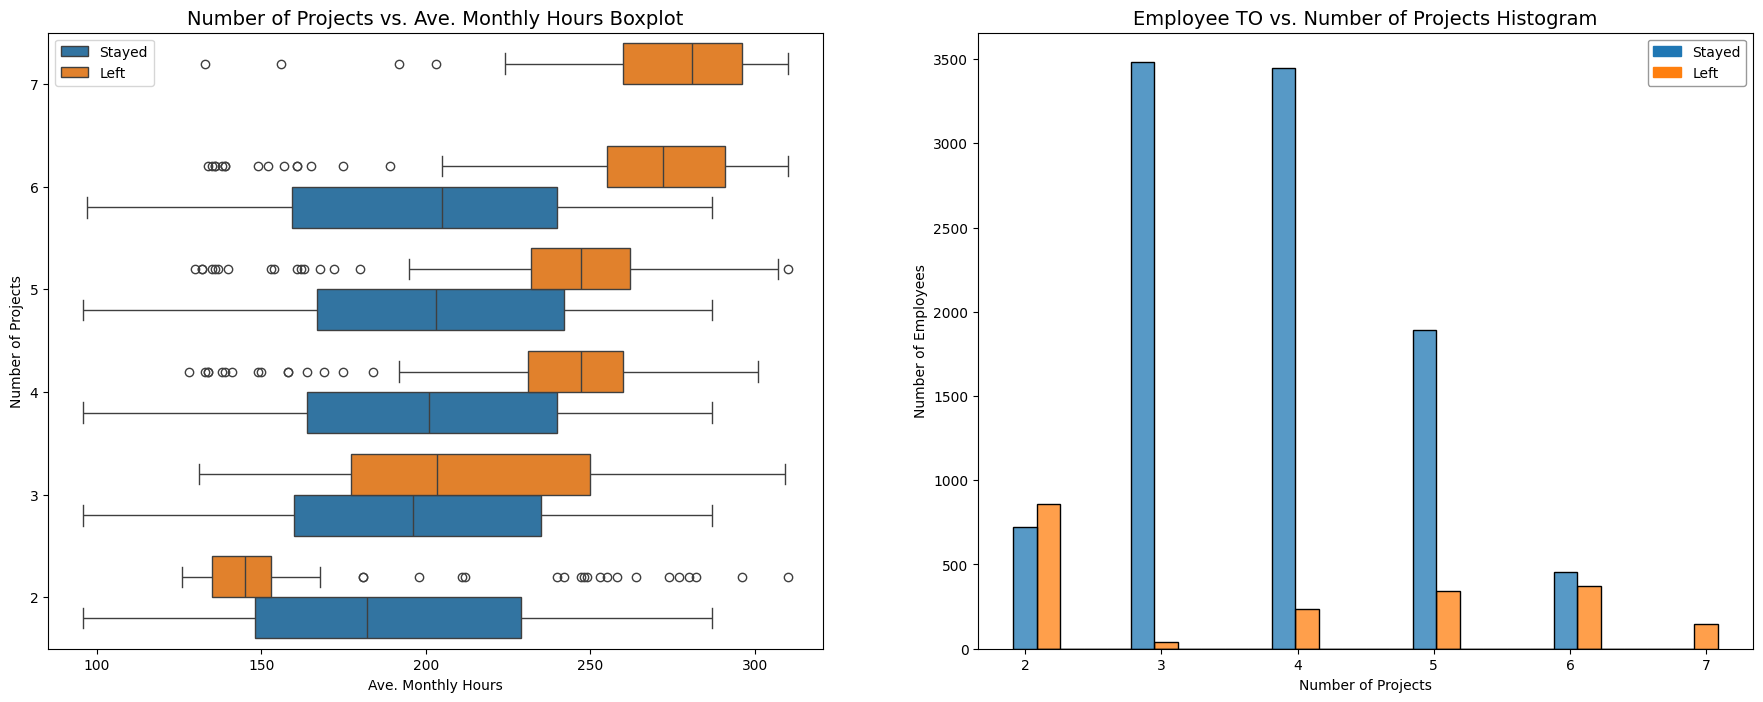

In [112]:
# visualize some of the data to get an idea of the story it might be telling

# let's see how employee retention relates to average hour worked and the number of projects they're working on
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=HR_df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
# set the titles and axis labels
ax[0].set_title('Number of Projects vs. Ave. Monthly Hours Boxplot', fontsize='14')
ax[0].set_xlabel('Ave. Monthly Hours')
ax[0].set_ylabel('Number of Projects')
# customize the legend or key
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles, labels=['Stayed', 'Left'],title=None)

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = HR_df1[HR_df1['left']==0]['number_project']
tenure_left = HR_df1[HR_df1['left']==1]['number_project']
sns.histplot(data=HR_df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1], legend=False)
# set the titles and axis labels
ax[1].set_title('Employee TO vs. Number of Projects Histogram', fontsize='14')
ax[1].set_xlabel('Number of Projects')
ax[1].set_ylabel('Number of Employees')
# manually create the legend for the second plot
from matplotlib.patches import Patch  # Use Patch for Seaborn-like legend
custom_legend = ['Stayed', 'Left']
colors = sns.color_palette()[:len(custom_legend)]  # Get the colors used in the plot
patches = [Patch(color=color, label=label) for color, label in zip(colors, custom_legend)]
ax[1].legend(handles=patches, title=None, loc='upper right', frameon=True, edgecolor='gray', fancybox=True, framealpha=0.8)

# show plots
plt.show()

In [113]:
# a few things stand out from these graphs
# 1. the ideal number of projects for an employee to work on is 3-4
# this is because the ratio of employees that left compared to stayed, seen in the histogram, is very low
# 2. two groups of employees are leaving the company, ones that work much less and ones that work much more than the average worker that stayed
# 3. it looks like everyone that worked 7 projects left

In [114]:
# check to see that everyone who worked 7 projects actually left
HR_df1[HR_df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

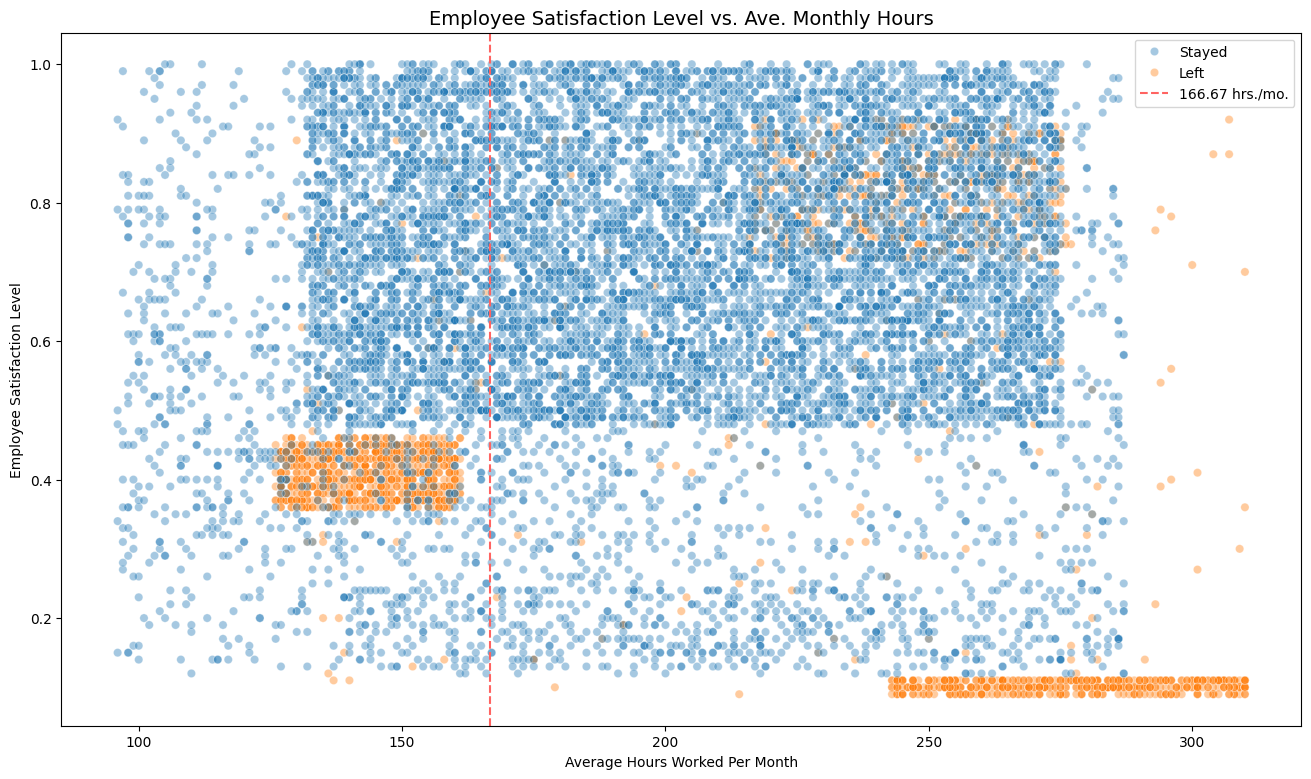

In [115]:
# now look at average monthly hours worked and satisfaction levels
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
scatter = sns.scatterplot(data=HR_df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.xlabel('Average Hours Worked Per Month')
plt.ylabel('Employee Satisfaction Level')
vline = plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
# the 166.67 hours per month line shows what is expected to be a normal amount of hours worked per month
# this is based on someone working 40 hours a week with 2 weeks of vacation a year
# 50 weeks * 40 hours per week / 12 months = 166.67 hours per month
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Stayed', 'Left', '166.67 hrs./mo.'],title=None)
plt.title('Employee Satisfaction Level vs. Ave. Monthly Hours', fontsize='14');

In [116]:
# there are three distinct groups of employees that left in the chart above
# the first group, works ~240-315 hours a month and has a VERY low (basically 0) satisfaction level
# this makes sense because they're likely upset about being overworked
# the second group, works slightly less than the normal 166.67 hours per month
# these workers either want to work more so they aren't very satisfied or they're feeling pressure to work more hours like the majority of employees
# the third group, works ~210-280 hours and have a high satisfaction level
# these specifc distribution shapes make the data look manipulated or synthetic 

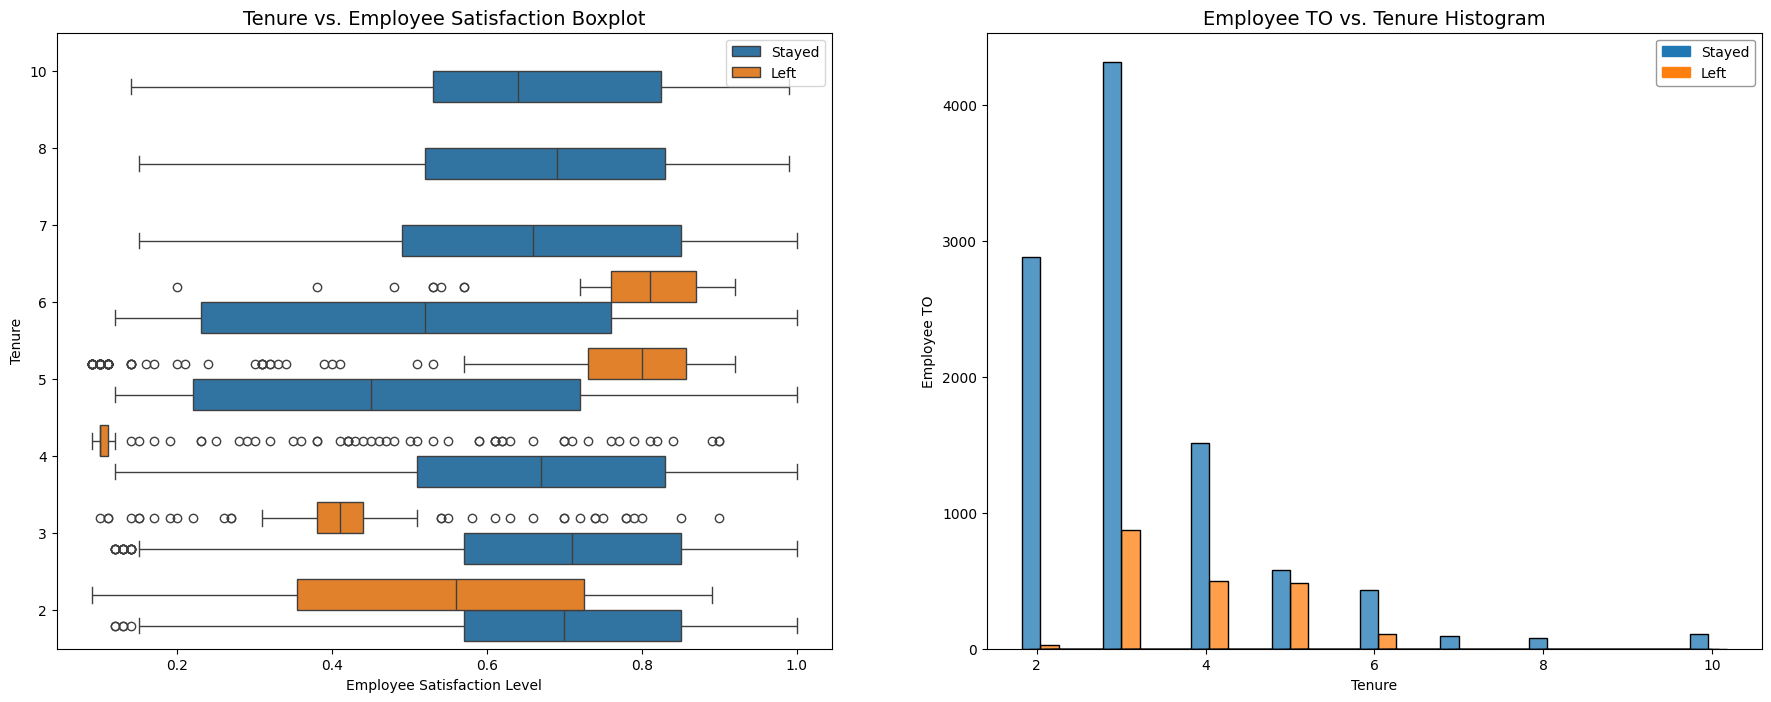

In [117]:
# next lets look at satisfaction level and tenure
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=HR_df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Tenure vs. Employee Satisfaction Boxplot', fontsize='14')
ax[0].set_xlabel('Employee Satisfaction Level')
ax[0].set_ylabel('Tenure')
# customize the legend or key
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles, labels=['Stayed', 'Left'],title=None)

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = HR_df1[HR_df1['left']==0]['tenure']
tenure_left = HR_df1[HR_df1['left']==1]['tenure']
sns.histplot(data=HR_df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Employee TO vs. Tenure Histogram', fontsize='14')
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Employee TO')
# manually create the legend for the second plot
from matplotlib.patches import Patch  # Use Patch for Seaborn-like legend
custom_legend = ['Stayed', 'Left']
colors = sns.color_palette()[:len(custom_legend)]  # Get the colors used in the plot
patches = [Patch(color=color, label=label) for color, label in zip(colors, custom_legend)]
ax[1].legend(handles=patches, title=None, loc='upper right', frameon=True, edgecolor='gray', fancybox=True, framealpha=0.8)

# show plots
plt.show()

In [118]:
# it appears that there may have been some kind of policy change around the 4 year tenured emplyees that could make them VERY unsatisfied
# it follows logic but employees that stay a long time are satisifed and those that leave will leave early because they aren't satisifed 

In [119]:
# see what the mean and median satisaction scores are for employees that stayed and left
HR_df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

Text(0, 0.5, 'Number of Employees')

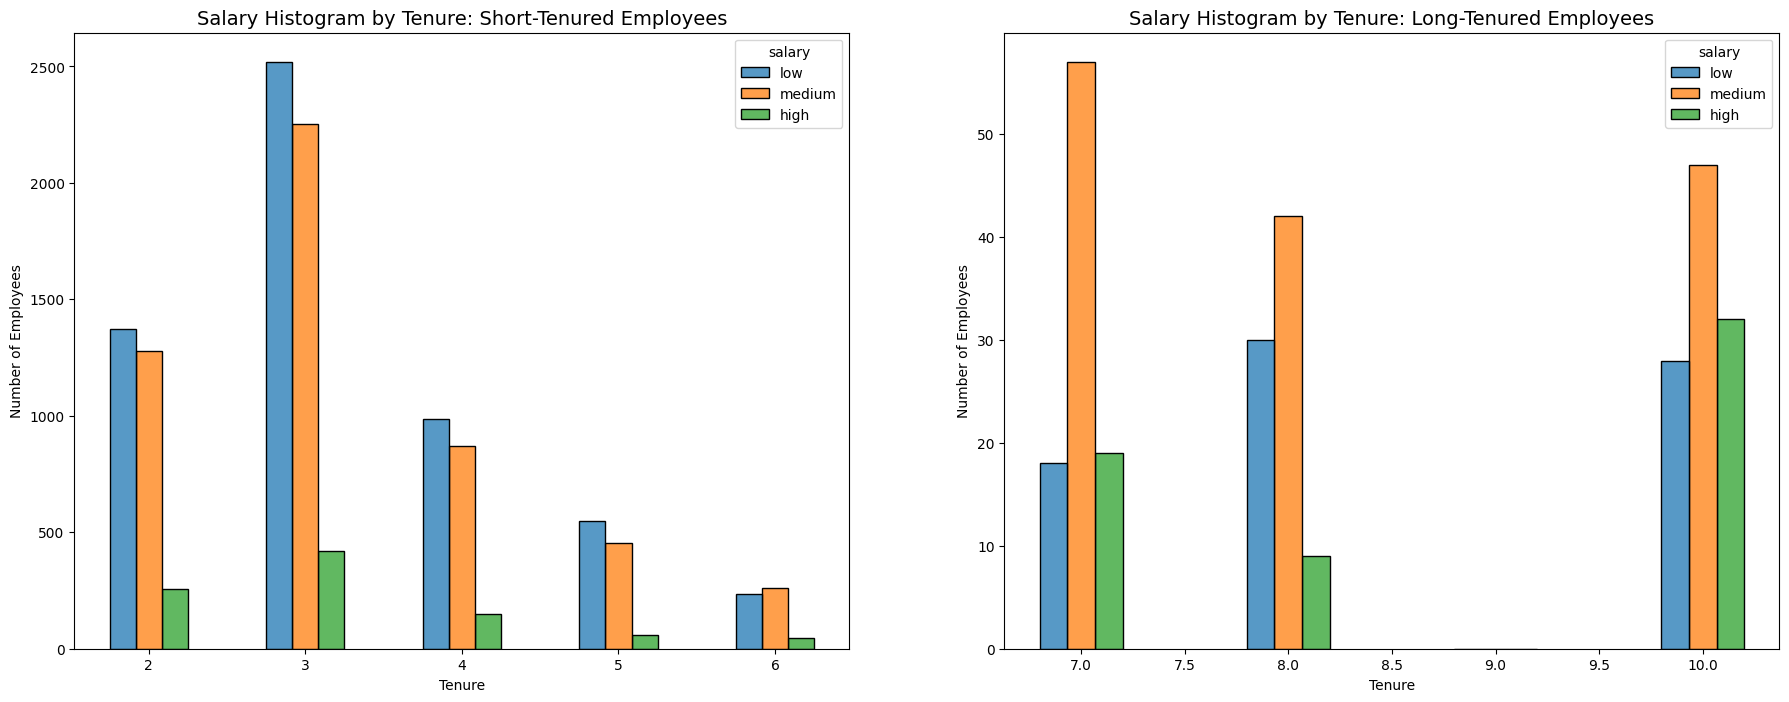

In [120]:
# check if the longer tenured employees are all highly paid employees by visualizing those relationships
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = HR_df1[HR_df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = HR_df1[HR_df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary Histogram by Tenure: Short-Tenured Employees', fontsize='14')
ax[0].set_xlabel('Tenure')
ax[0].set_ylabel('Number of Employees')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary Histogram by Tenure: Long-Tenured Employees', fontsize='14')
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Number of Employees')

In [121]:
# the longer tenured employees are not disporoportionately compromised of higher-paid employees

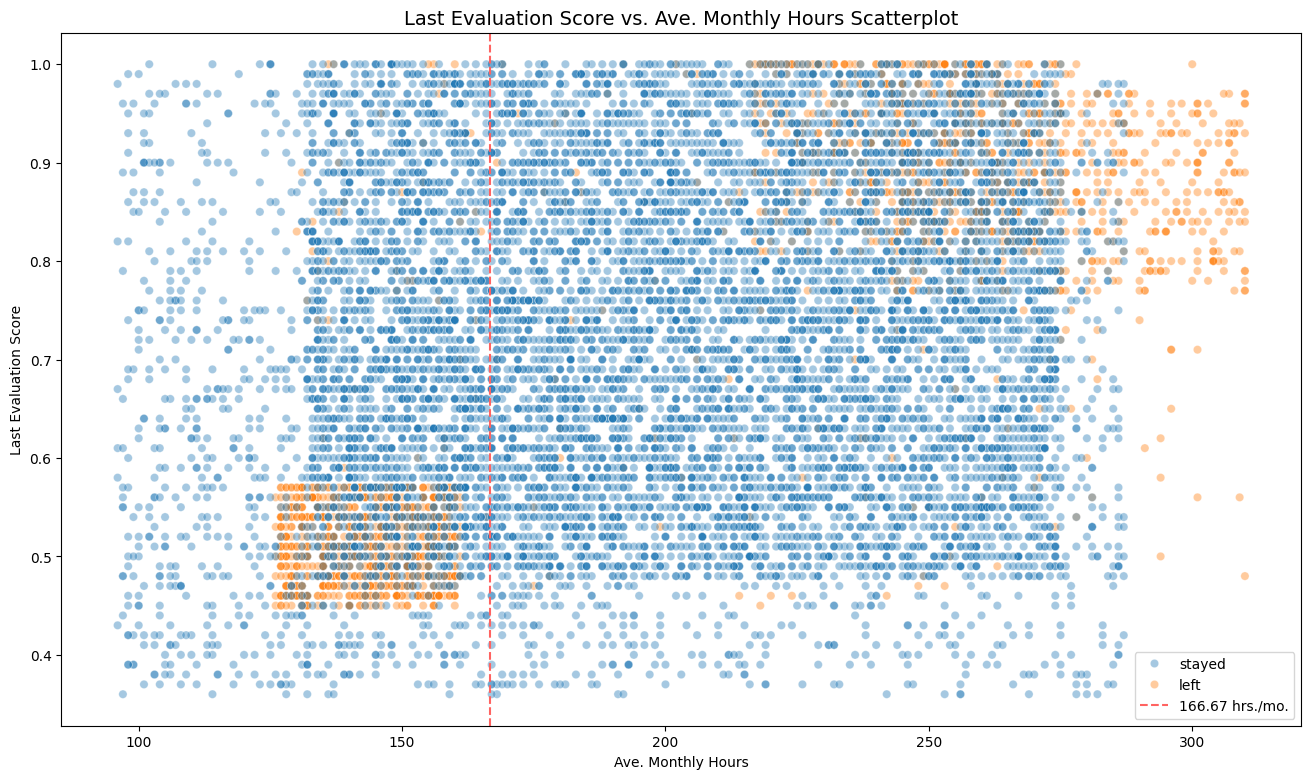

In [122]:
# check the relationship between an employees evaluation and averahe monthly hours
# create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
scatter = sns.scatterplot(data=HR_df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.title('Last Evaluation Score vs. Ave. Monthly Hours Scatterplot', fontsize='14')
plt.xlabel('Ave. Monthly Hours')
plt.ylabel('Last Evaluation Score')
vline = plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
# retrieve handles and labels from scatterplot legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=['stayed', 'left', '166.67 hrs./mo.'], title=None)

In [123]:
# there are two clear groups of employees who left
# first, employees that worked a lot of hours and were highly evaluated 
# second, employees that worked slightly less than average and were not evaluated highly
# there seems to be some correlation between evaluation and hours worked but it's not guaranteed that working more hours raises your evaluation

Text(0, 0.5, 'Promoted Within the Last 5 Years')

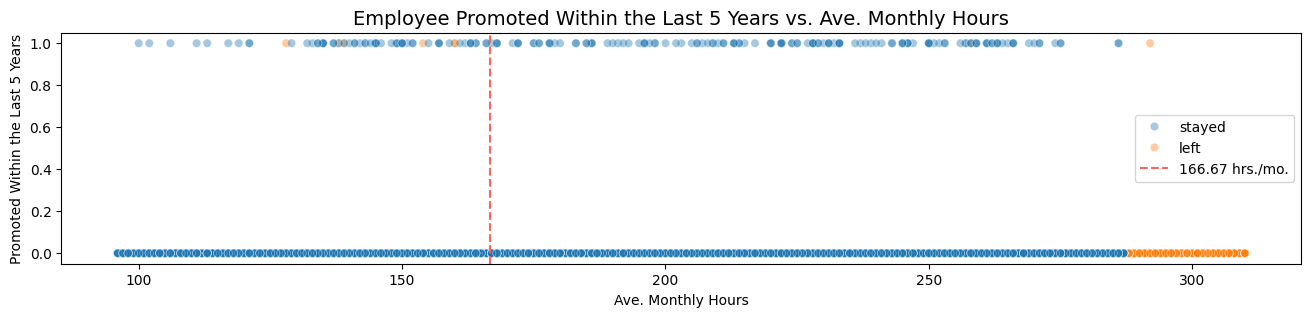

In [124]:
# see if employees that worked more hours got promotions
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=HR_df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=['stayed', 'left', '166.67 hrs./mo.'], title=None)
plt.title('Employee Promoted Within the Last 5 Years vs. Ave. Monthly Hours', fontsize='14')
plt.xlabel('Ave. Monthly Hours')
plt.ylabel('Promoted Within the Last 5 Years')

In [125]:
# here we see that hour worked and being promoted are not correlated
# all of the employees that left worked the most hours
# not many employees have been promoted

In [126]:
# check the distribution of employees that left across each department
HR_df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

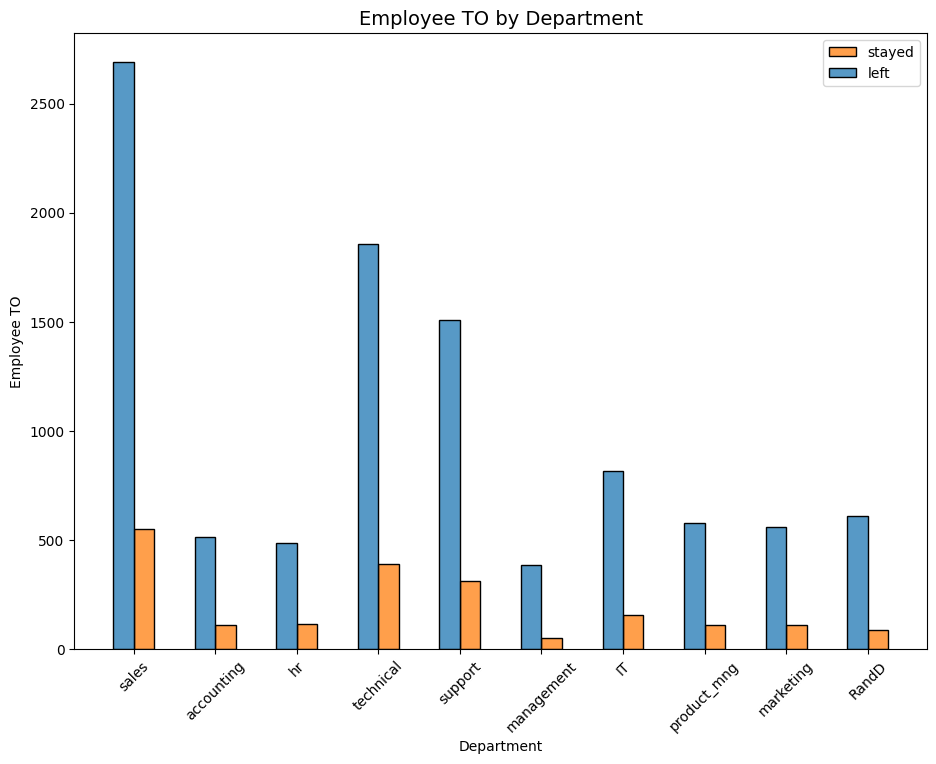

In [127]:
# compare the number that left to the number that stayed in each department
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=HR_df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Employee TO by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Employee TO')
plt.legend(labels=['stayed', 'left'], title=None)

In [128]:
# nothing seems to stand out much here

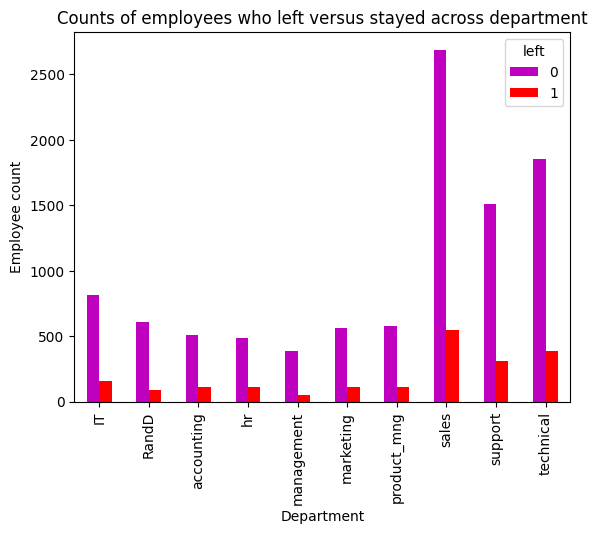

In [129]:
# just another way of plotting this 
pd.crosstab(HR_df1['department'], HR_df1['left']).plot(kind ='bar',color='mr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

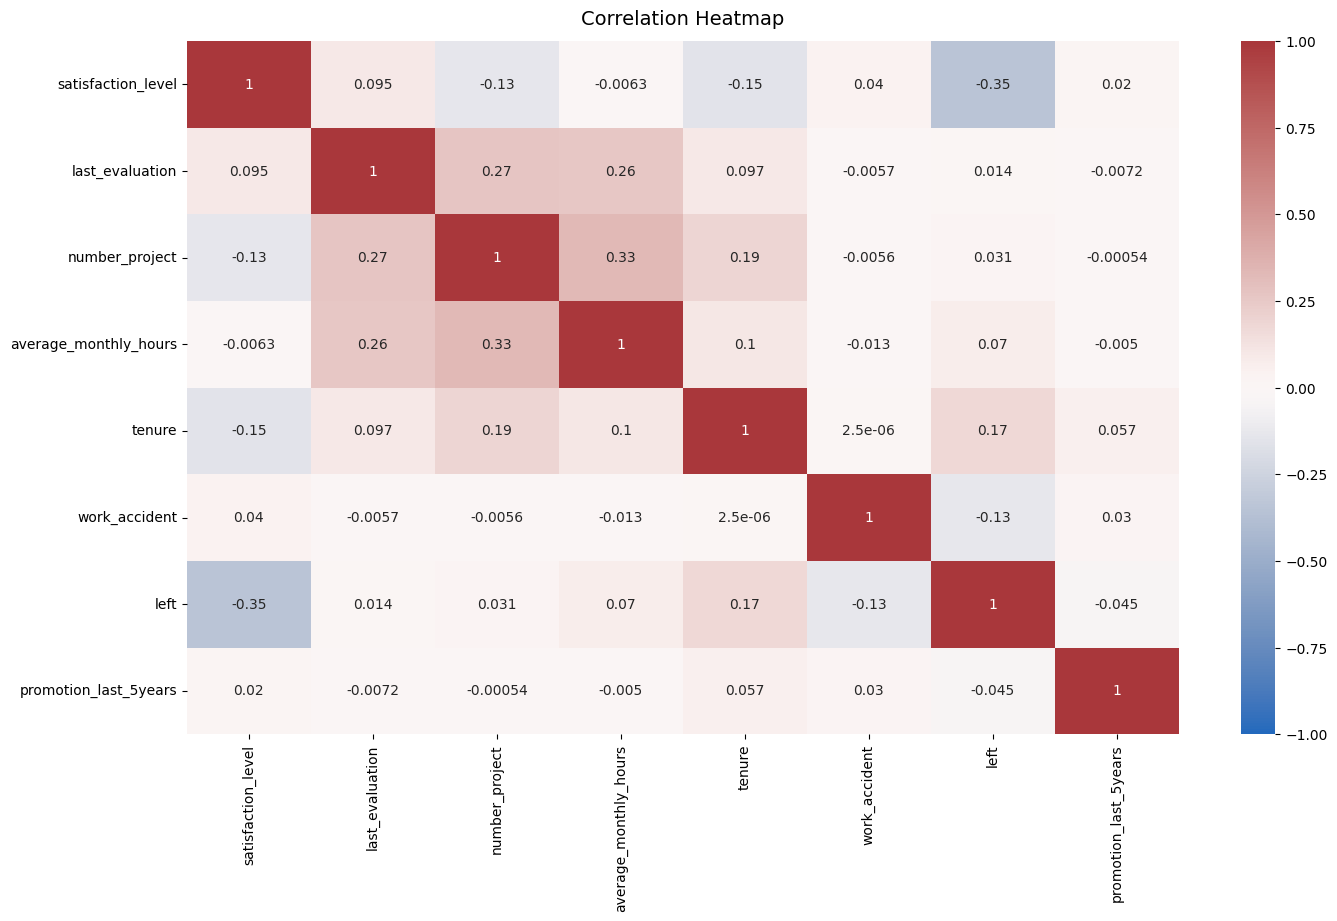

In [130]:
# lastly lets just check correlation between all the variables
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
# get only the numeric columns of data for the correlation heatmap
numeric_df = HR_df1.select_dtypes(include=['number'])
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

In [131]:
# the correlation heatmap shows that number of projects, monthly hours, and evaluation scores all are positively correlated
# we also see that whether an employee leaves is negatively correlatd with their satisfaction level

In [132]:
# time to begin modeling using logistic regression
# encode the independent categorical variables
HR_df_enc = HR_df1.copy()

# encode the salary column so that the order still contains it's values, the salary column is an ordinal variable that has a natural order that needs to be kept
HR_df_enc['salary'] = (
    HR_df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# encode the department column that does not have ordinal value
HR_df_enc = pd.get_dummies(HR_df_enc, drop_first=False)

# check the newly encoded columns
HR_df_enc.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

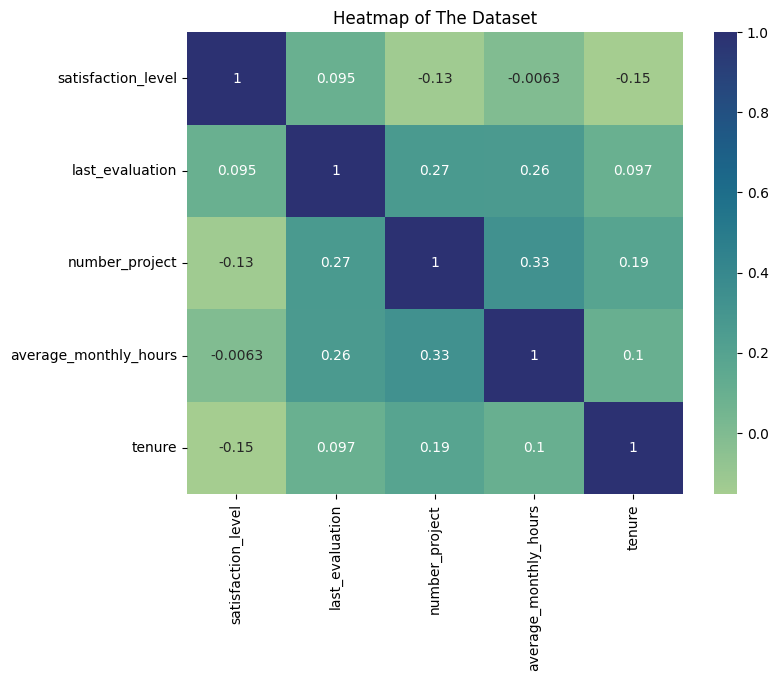

In [133]:
# check correlation again to help pick what independent variables can be used in the model
plt.figure(figsize=(8, 6))
sns.heatmap(HR_df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of The Dataset')
plt.show()

In [134]:
# select the rows without outliers in the tenure column usng the previously calculated limits so the model runs better
HR_df_logreg = HR_df_enc[(HR_df_enc['tenure'] >= lower_limit) & (HR_df_enc['tenure'] <= upper_limit)]

# check the first few rows of new dataframe
HR_df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [135]:
# isolate the target variable
y = HR_df_logreg['left']

# check the first few rows
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [136]:
# select the independent variables to use in the model
x = HR_df_logreg.drop('left', axis=1)

# check the first few rows
x.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

In [137]:
# split the data into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [138]:
# construct a logistic regression model
HR_log_clf = LogisticRegression(random_state=0, max_iter=500).fit(x_train, y_train)

In [139]:
# get predicted values using the model and the testing data
y_preds = HR_log_clf.predict(x_test)

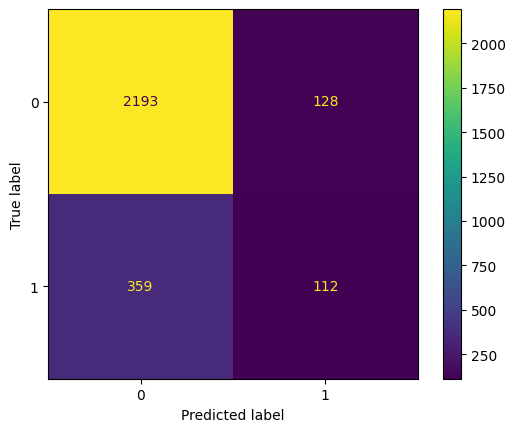

In [140]:
# make a confusion matrix to view model performance
# get the values for the confusion matrix
HR_log_cm = confusion_matrix(y_test, y_preds, labels=HR_log_clf.classes_)

# create the display for the confusion matrix
HR_log_disp = ConfusionMatrixDisplay(confusion_matrix=HR_log_cm, 
                                     display_labels=HR_log_clf.classes_)

# plot the confusion matrix
HR_log_disp.plot(values_format='')

# show the plot
plt.show()

In [141]:
# check the class balances again to see if it's too imbalanced 
HR_df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [142]:
# it's imbalanced but not TOO imbalanced, so resampling does not need to be done
# let's continue evaluating the model

In [143]:
# make a classificaton report for the model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_preds, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      2321
    Predicted would leave       0.47      0.24      0.32       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



In [144]:
# the model did not perform very well on the most important aspect, predicting employees that will leave
# let's give other models a try

In [145]:
# instantiate a decision tree classifier model
dec_tree = DecisionTreeClassifier(random_state=0)

# make a dictionary of the hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [2, 4, 6]
             }

# make a dictionary of the scorin criteria to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# instantiate the GridSearch object
dec_tree1 = GridSearchCV(dec_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [146]:
# fit the decision tree model
dec_tree1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [147]:
# check what the best parameters are
dec_tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [148]:
# check what the best AUC score is
dec_tree1.best_score_

0.9743823751317063

In [149]:
# make a function that will get all the scores from the decision tree model
def make_results(model_name:str, model_object, metric:str):
    # make a dictionary that maps the input metrics to the actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    
    # get all the results from the model and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # isolate the row of the dataframe with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # extract accuracy, precision, recall, f1, and auc score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # make a table of the results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
    
    return table

In [150]:
# get all the model's scores
dec_tree1_cv_results = make_results('decision tree cv', dec_tree1, 'auc')
dec_tree1_cv_results

model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.955522  0.91497  0.934765  0.978508  0.974382

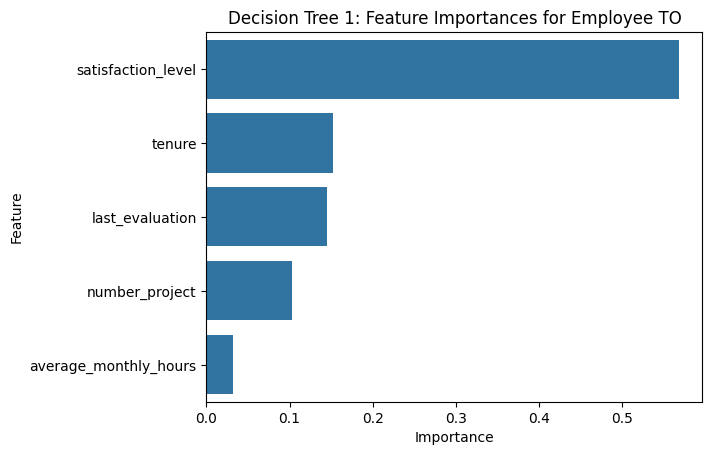

In [151]:
# graph the most important features
dec_tree1_importances = pd.DataFrame(dec_tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=x.columns
                                )
dec_tree1_importances = dec_tree1_importances.sort_values(by='gini_importance', ascending=False)

# only extract the features with importance of greater than 0
dec_tree1_importances = dec_tree1_importances[dec_tree1_importances['gini_importance'] != 0]

# let's visualize the feature importance by plotting them in a bar graph
sns.barplot(data=dec_tree1_importances, x="gini_importance", y=dec_tree1_importances.index, orient='h')
plt.title("Decision Tree 1: Feature Importances for Employee TO", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [152]:
# the decision tree produced good scores and this indicates it is likely a strong model
# however, decision trees are succeptible to overfitting so let's try a random forest classifier as-well

In [153]:
# instantiate a random forest classifier
rf = RandomForestClassifier(random_state=0)

# make a dictionary of hyperparameters to go through
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# make a dictionary of scoring metrics to use
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# instantiate the GridSearch object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [154]:
# fit the model
# rf1.fit(x_train, y_train)
# commented out because this modelhas been pickled

In [155]:
# make a path to the desired folder to save the model
path = 'C:\\Users\\SpeeJ\\OneDrive\\Desktop\\Google_Advanced_DA_Course_Stuff\\Capstone_Project\\'

In [156]:
# make a function that will pickle (save) the model
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [157]:
# make a function that will pull the pickled model
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [158]:
# pickle the model
# write_pickle(path, rf1, 'HR_rf1')
# now commented out so I can run all and retrive this model

In [159]:
# read in the pickled model
rf1 = read_pickle(path, 'HR_rf1')

In [160]:
# get the best scores from the random forest model
rf1.best_score_

0.9818158627884357

In [161]:
# get the best parameters from the model
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [162]:
# get all of the CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(dec_tree1_cv_results)
print(rf1_cv_results)

              model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.955522  0.91497  0.934765  0.978508  0.974382
              model  precision   recall        F1  accuracy       auc
0  random forest cv   0.970653  0.91497  0.941924  0.981015  0.981816


In [163]:
# make a funtion that gets all the scores from the random forest model
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [164]:
# now evaluate the model with the test set using our get_scores function
rf1_test_scores = get_scores('random forest1 test', rf1, x_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy      AUC
0  random forest1 test   0.967033  0.934183  0.950324  0.983524  0.96386

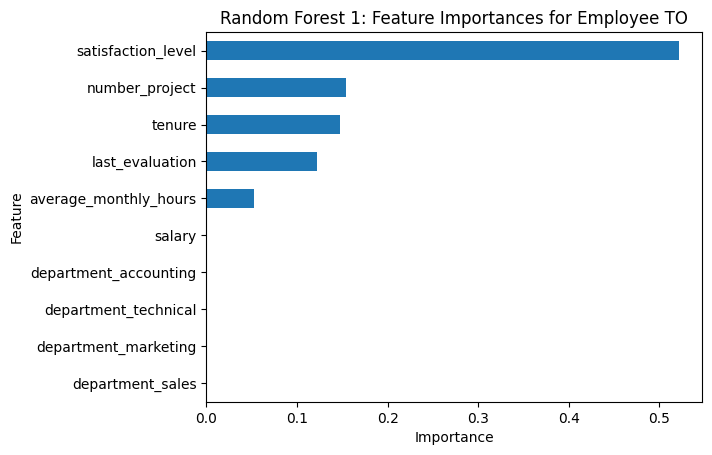

In [165]:
# now let's plot the features from the second random forest model
# get the feature importance
feature_importane = rf1.best_estimator_.feature_importances_

# get the indices of the top 10 features
indices = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# get the column labels of those features
features = x.columns[indices]

# filter the features so we have the top ten
feature_importane = feature_importane[indices]

# now set up theplot of these features in order of highest to lowest
y_df = pd.DataFrame({"Feature":features,"Importance":feature_importane})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest 1: Feature Importances for Employee TO", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")
ax1.legend().remove()

plt.show()

In [166]:
# the test scores are similar to the validation scores, which is a good sign
# the model appears to be strong and we can be more confident in it since thetest data was only used here
# it makes us feel good about how it will perform on unseen data

In [167]:
# we'll try removing data leakage from the models (using data to train a model that you might not have during deployment)
# time to do some feature engineering to try and improve model results

In [168]:
# drop satisfaction_level and make a new dataframe because it may have some data leakage
HR_df2 = HR_df_enc.drop('satisfaction_level', axis=1)

# check the new dataframe
HR_df2.head(5)

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       1          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [169]:
# lets make an overworked column
# start by making the column from the average monthly hours column
HR_df2['overworked'] = HR_df2['average_monthly_hours']

# check what the max and min average monthly hours are to get an idea of the range of values
print('Max hours:', HR_df2['overworked'].max())
print('Min hours:', HR_df2['overworked'].min())

Max hours: 310
Min hours: 96


In [170]:
# we calculated the average numberof monthly hours for someone who works 50 weeks per year, 5 das a week, and 8 hours per day earlier, about 167 hours
# let's say someone is overworked if they work more than 175 hours per month
# make the overworked column 1 if it's over 175 and 0 otherwise
HR_df2['overworked'] = (HR_df2['overworked'] > 175).astype(int)

# check the first few rows of this column
HR_df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [171]:
# now let's drop the average_monthly_hours column since it may also have some data leakage
HR_df2 = HR_df2.drop('average_monthly_hours', axis=1)

# check the first few rows
HR_df2.head(5)

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

In [172]:
# now isolate the dependent and independent variables to be used in the model
y = HR_df2['left']

x = HR_df2.drop('left', axis=1)

In [173]:
# seperate the dataset into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [174]:
# now let's make the second iteration of the decision tree
# instantiate the decision tree model
dec_tree = DecisionTreeClassifier(random_state=0)

# make a dictionary of the hyperparameters to look over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# make a dictionary of the scoring metrics to get
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# instantiate the GridSearch object
dec_tree2 = GridSearchCV(dec_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [175]:
# fit the model
dec_tree2.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [176]:
# check what the best parameters are 
dec_tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [177]:
# checkwhat the best auc score is
dec_tree2.best_score_

0.9586752505340426

In [178]:
# get all of the models scores and compare them to the first decision tree that we made
dec_tree2_cv_results = make_results('decision tree2 cv', dec_tree2, 'auc')
print(dec_tree1_cv_results)
print(dec_tree2_cv_results)

              model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.955522  0.91497  0.934765  0.978508  0.974382
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


In [179]:
# now lets try with the random forest model
# instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# make a dictionary of the hyperparameters to look over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# make a dictionary of the scoring metrics to look at
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# instantiate the GridSearch object
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [180]:
# fit the model
# rf2.fit(x_train, y_train)
# commented out because the model has been pickled and we'll just read it in

In [181]:
# pickle the model
# write_pickle(path, rf2, 'HR_rf2')
# commented out so we can just run every cell in the notebook when we come back

In [182]:
# read in the pickled model
rf2 = read_pickle(path, 'HR_rf2')

In [183]:
# get the model's best parameters
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [184]:
# get the best auc score of the model
rf2.best_score_

0.9648100662833985

In [185]:
# get all the scores from the model and compare them to the second decision tree
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(dec_tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [186]:
# the random forest model has a slightly better auc score so it will be considered our best model

In [187]:
# get predictions from the best model
rf2_test_scores = get_scores('random forest2 test', rf2, x_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

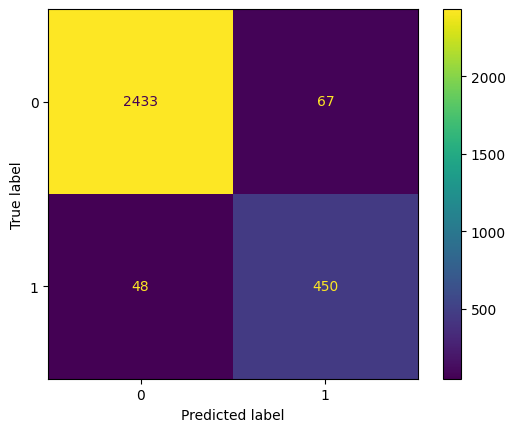

In [188]:
# now let's plot a confusion matrix
# get the predictions from the best model
preds = rf2.best_estimator_.predict(x_test)

# get the values for the confusion matrix
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

In [189]:
# we are seeing more false positives than false negatives so there are more employees that are being identified as at risk of leaving or being let go when that's not the case

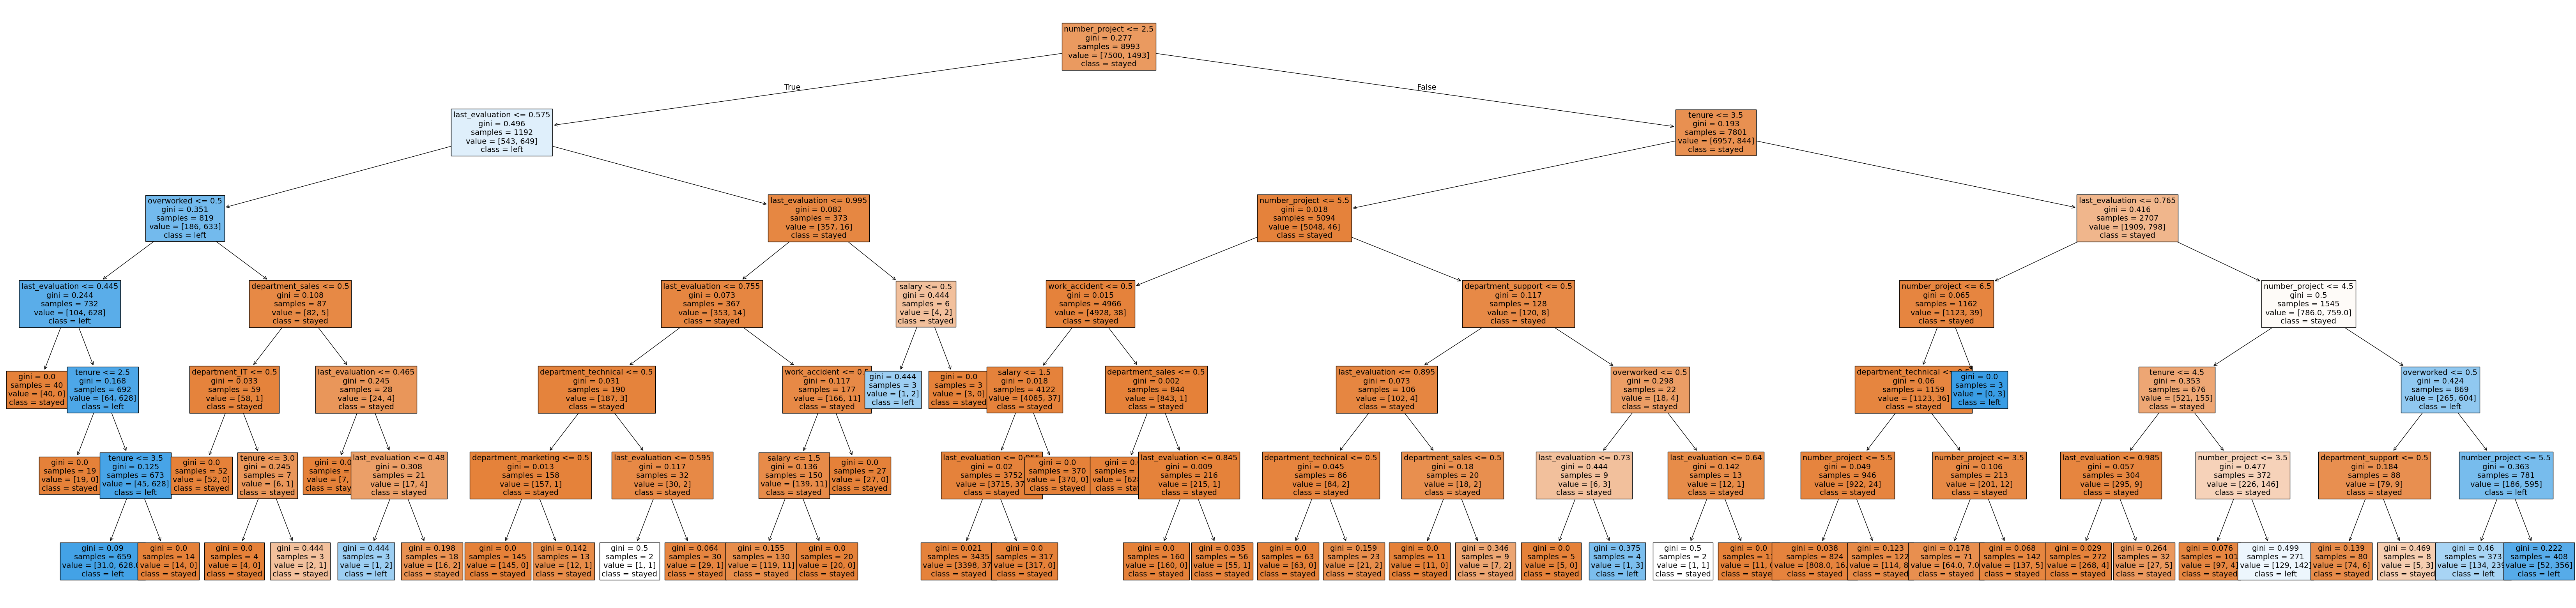

In [190]:
# lets check some of the splits of the decision tree to investigate things more
# plot the second decision tree
plt.figure(figsize=(85,20))
plot_tree(dec_tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [191]:
# now let's see the feature impotance of the tree
dec_tree2_importances = pd.DataFrame(dec_tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=x.columns
                                )
dec_tree2_importances = dec_tree2_importances.sort_values(by='gini_importance', ascending=False)

# only extract the features with importance of greater than 0
dec_tree2_importances = dec_tree2_importances[dec_tree2_importances['gini_importance'] != 0]
dec_tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

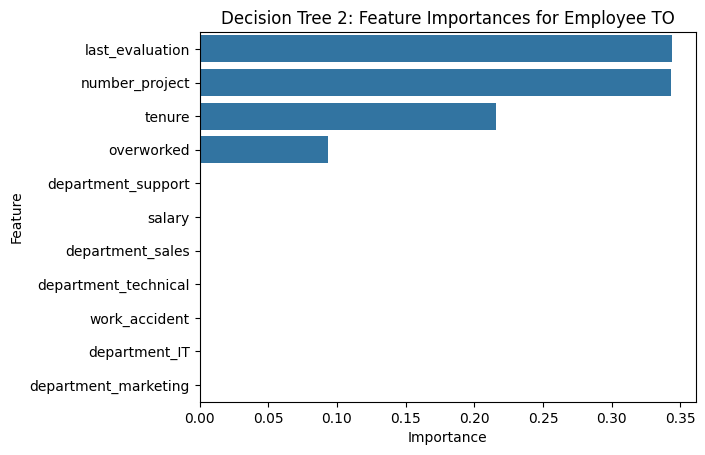

In [192]:
# let's visualize the feature importance by plotting them in a bar graph
sns.barplot(data=dec_tree2_importances, x="gini_importance", y=dec_tree2_importances.index, orient='h')
plt.title("Decision Tree 2: Feature Importances for Employee TO", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [193]:
# we see clearly that the most important features from this are last evaluation, number of projects, tenure, and if they're overworked

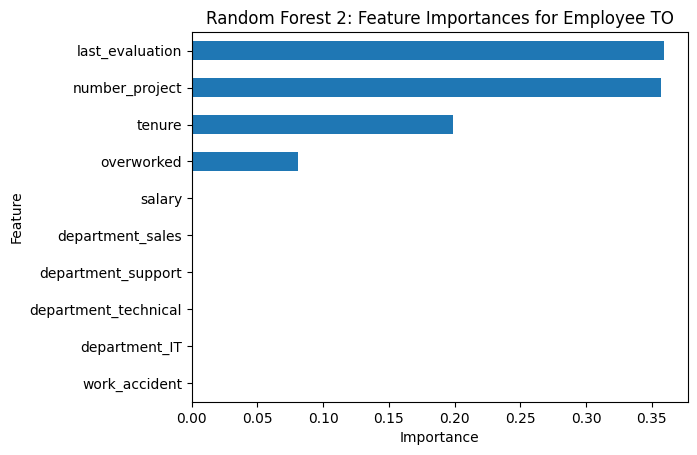

In [194]:
# now let's plot the features from the second random forest model
# get the feature importance
feature_importane = rf2.best_estimator_.feature_importances_

# get the indices of the top 10 features
indices = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# get the column labels of those features
features = x.columns[indices]

# filter the features so we have the top ten
feature_importane = feature_importane[indices]

# now set up theplot of these features in order of highest to lowest
y_df = pd.DataFrame({"Feature":features,"Importance":feature_importane})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest 2: Feature Importances for Employee TO", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")
ax1.legend().remove()

plt.show()

In [195]:
# Both tree models performed better than the logistic regression model. The random forest ended up being a tiny bit better than the regulard decision tree.
# We learned throughout this process that employees are being overworked at this company. This is one of the major factors in employee turnover.
# The other important factors were the employees evaluation (likely relates to whether an employee is let go), and number of projects being worked on (likely sorrelates with an employee being overworked).
# Some things that could b done to help employee retention and help improve the satisfaction of employees in these tough situations are: 
# cap the number of projects an employee can work on
# increase overtime benefits and make sure employees are aware of the companies benefits for employees that work more hours
# possibly limit or just reduce the number of hours employees work
# hold company wide meetings to address the work culture at the company